In [1]:
import cv2
import apriltag
import numpy as np
from matplotlib import pyplot as plt

In [1246]:
# import os

# # Path to the video file
# video_path = "20250330_193106_rec_vids.mp4"

# # Directory to save the extracted images
# output_dir = "20250330_193106_rec_vids"
# os.makedirs(output_dir, exist_ok=True)

# # Open the video file
# cap = cv2.VideoCapture(video_path)

# frame_count = 0
# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break
#     # Save the frame as an image
#     frame_filename = os.path.join(output_dir, f"20250330_193106_rec_vids_{frame_count:04d}.jpg")
#     cv2.imwrite(frame_filename, frame)
#     frame_count += 1

# cap.release()
# print(f"Extracted {frame_count} frames to '{output_dir}'")

Extracted 650 frames to '20250330_193106_rec_vids'


In [1128]:
image_path = "250330.png"
image_path = "webcam_franka_2025-03-29-161236.jpg"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


frame_center_crop = img[300:780, 700:1320]
frame_grey_center_crop = gray[300:780, 700:1320]

In [1096]:
template_chip = cv2.imread("template_chip_op2.png", cv2.IMREAD_GRAYSCALE)
template_chip_blur = cv2.GaussianBlur(template_chip, (5, 5), 0).astype(np.uint8)
template_chip_blur = cv2.imread("template_chip_degraded.jpeg", cv2.IMREAD_GRAYSCALE)
template_chip_blur = cv2.resize(template_chip_blur, (120, 200))

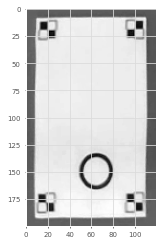

In [1097]:
plt.imshow(template_chip_blur, cmap='gray')

In [40]:
chip_atag_img = cv2.imread("IMG_5179.JPG")
chip_atag_crop = chip_atag_img[2000:3000, 1000:2000]
chip_atag_crop_gray = cv2.cvtColor(chip_atag_crop, cv2.COLOR_BGR2GRAY)
# add blur to the image
chip_atag_crop_gray = cv2.GaussianBlur(chip_atag_crop_gray, (5, 5), 0).astype(np.uint8)
# add noise to the image
chip_atag_crop_gray = cv2.add(chip_atag_crop_gray, np.random.normal(0, .5, chip_atag_crop_gray.shape).astype(np.uint8))
# add blur to the image
chip_atag_crop_gray = cv2.GaussianBlur(chip_atag_crop_gray, (11, 11), 0).astype(np.uint8)

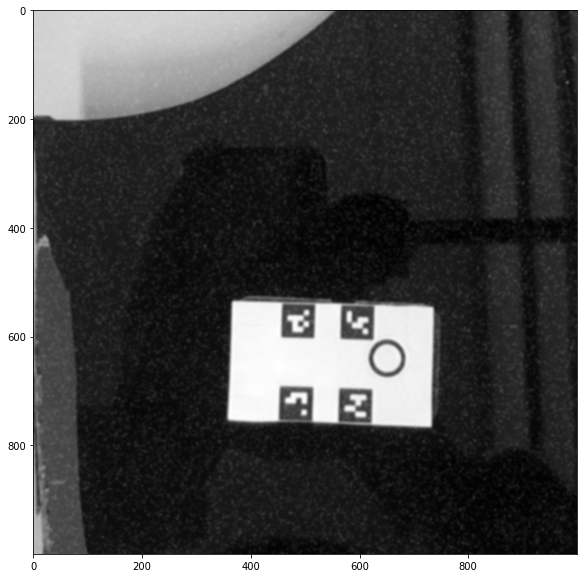

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(chip_atag_crop_gray, cmap='gray')

In [42]:
# plt.imshow(chip_atag_img, cmap='gray')
at_det = apriltag.Detector(apriltag.DetectorOptions(families="tag16h5"))
at_det_result = at_det.detect(chip_atag_crop_gray)
at_det_result

[Detection(tag_family=b'tag16h5', tag_id=0, hamming=0, goodness=0.0, decision_margin=79.00555419921875, homography=array([[ 5.31889844e-02, -7.52081754e-01, -1.13674762e+01],
        [ 8.16290292e-01, -6.80143306e-02, -1.69796988e+01],
        [ 1.65661476e-04, -7.38344917e-05, -2.34997065e-02]]), center=array([483.72843416, 722.54939851]), corners=array([[452.22085571, 751.45495605],
        [454.08898926, 691.97113037],
        [515.48321533, 693.41705322],
        [512.76983643, 752.51068115]])),
 Detection(tag_family=b'tag16h5', tag_id=1, hamming=0, goodness=0.0, decision_margin=82.1875, homography=array([[-2.96730692e-02, -6.22068942e-01, -1.14911799e+01],
        [ 6.94211720e-01,  9.00996462e-02, -1.35033315e+01],
        [-1.39466873e-05,  1.82547762e-04, -2.35841728e-02]]), center=array([487.2411675 , 572.55904727]), corners=array([[456.34408569, 601.51470947],
        [458.30438232, 542.42462158],
        [518.58319092, 543.18640137],
        [516.66418457, 603.1998291 ]])),


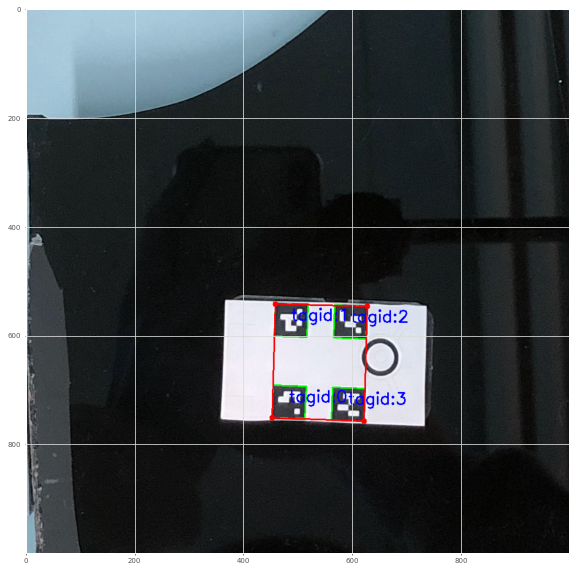

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))
frame = chip_atag_crop.copy()
for at_detections in at_det_result:
    corners = at_detections.corners
    tag_id = at_detections.tag_id

    cv2.polylines(frame, [corners.astype(int)], True, (0,255,0), 2)

    tag_center = tuple(at_detections.center.astype(int))
    cv2.putText(frame, f"tagid:{tag_id}", tag_center, cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

# sort at_det_result by tag_id
at_det_result = sorted(at_det_result, key=lambda x: x.tag_id)[:4]
tag_0_top_left = at_det_result[0].corners[0]
tag_1_top_right = at_det_result[1].corners[1]
tag_2_bottom_right = at_det_result[2].corners[2]
tag_3_bottom_left = at_det_result[3].corners[3]

cv2.circle(frame, tag_0_top_left.astype(int).tolist(), 5, (255, 0, 0), -1)
cv2.circle(frame, tag_1_top_right.astype(int).tolist(), 5, (255, 0, 0), -1)
cv2.circle(frame, tag_2_bottom_right.astype(int).tolist(), 5, (255, 0, 0), -1)
cv2.circle(frame, tag_3_bottom_left.astype(int).tolist(), 5, (255, 0, 0), -1)

combined_corners = np.stack([tag_0_top_left,
                      tag_1_top_right,
                      tag_2_bottom_right, 
                      tag_3_bottom_left])

cv2.polylines(frame, [combined_corners.astype(int)], True, (255,0,0), 2)

# cv2.circle(frame, tag_0_top_left.astype(int).tolist(), 5, (255, 0, 0), -1)
# cv2.circle(frame, tag_1_top_right.astype(int).tolist(), 5, (255, 0, 0), -1)
# cv2.circle(frame, tag_2_bottom_right.astype(int).tolist(), 5, (255, 0, 0), -1)
# cv2.circle(frame, tag_3_bottom_left.astype(int).tolist(), 5, (255, 0, 0), -1)
ax.imshow(frame)

In [52]:
combined_corners

array([[452.22085571, 751.45495605],
       [458.30438232, 542.42462158],
       [627.24389648, 546.29907227],
       [621.93701172, 757.75457764]])

In [58]:
corners_phy_meter_rack = np.array([[0., 0.], [0.081, 0.], [0.081, 0.1215], [0., 0.1215]])

corners_phy_meter = np.array([[0., 0.], [0.028, 0.], [0.028, 0.023], [0., 0.023]])

homography, status = cv2.findHomography(corners_phy_meter, combined_corners)
homography, status

(array([[ 2.98365440e+02,  7.07128942e+03,  4.52220856e+02],
        [-7.36938720e+03, -1.00966583e+02,  7.51454956e+02],
        [ 1.76949300e-01, -4.94702617e-01,  1.00000000e+00]]),
 array([[1],
        [1],
        [1],
        [1]], dtype=uint8))

In [1315]:
def match_fiducial_orb(source, template, 
                       min_match_count=1, 
                       good_match_ratio=0.75):
    """
    Detects the fiducial marker (template) in the source image using ORB feature matching.
    Returns:
        homography: The 3x3 homography matrix if enough matches are found, otherwise None
        corners_in_scene: The projected corner coordinates of the template in the source image
                          as a numpy array of shape (4, 2). None if not found.
        matches_mask: A mask array that indicates which matches are inliers (for visualization)
    """

    # 1. Convert images to grayscale (ORB works on grayscale)
    gray_source = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY) \
        if len(source.shape) == 3 else source
    gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY) \
        if len(template.shape) == 3 else template

    # 2. Initialize ORB detector
    orb = cv2.ORB_create(
        nfeatures = 200,                    # The maximum number of features to retain.
        scaleFactor = 1.3,                  # Pyramid decimation ratio, greater than 1
        nlevels = 6,                        # The number of pyramid levels.
        edgeThreshold = 7,                  # This is size of the border where the features are not detected. It should roughly match the patchSize parameter
        firstLevel = 0,                     # It should be 0 in the current implementation.
        WTA_K = 2,                          # The number of points that produce each element of the oriented BRIEF descriptor.
        scoreType = cv2.ORB_HARRIS_SCORE,   # The default HARRIS_SCORE means that Harris algorithm is used to rank features (the score is written to KeyPoint::score and is 
                                            # used to retain best nfeatures features); 
        # scoreType = cv2.ORB_FAST_SCORE,     # FAST_SCORE is alternative value of the parameter that produces slightly less stable 
                                            # keypoints, but it is a little faster to compute.
        patchSize = 7                      
    )

    # 3. Detect keypoints and compute descriptors
    kp_template, desc_template = orb.detectAndCompute(gray_template, None)
    kp_source, desc_source = orb.detectAndCompute(gray_source, None)

    # Check if descriptors are valid
    if desc_template is None or desc_source is None:
        return None, None, None, None, None

    # 4. Use a brute-force matcher or FLANN-based matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

    # 5. Match descriptors (KNN)
    matches_knn = bf.knnMatch(desc_template, desc_source, k=2)
    
    # 6. Lowe's ratio test to filter good matches
    good_matches = []
    for m, n in matches_knn:
        if m.distance < good_match_ratio * n.distance:
            good_matches.append(m)

    # 7. Check if enough matches are present
    if len(good_matches) < min_match_count:
        # Not enough matches to reliably compute homography
        return None, None, None

    # 8. Extract matched keypoints’ coordinates
    src_pts = np.float32([kp_template[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp_source[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # 9. Compute homography with RANSAC
    homography, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matches_mask = mask.ravel().tolist()

    if homography is None:
        return None, None, None

    # 10. Once we have the homography, transform the corners of the template
    hT, wT = gray_template.shape[:2]
    template_corners = np.float32([[0, 0],
                                   [wT, 0],
                                   [wT, hT],
                                   [0, hT]]).reshape(-1, 1, 2)

    corners_in_scene = cv2.perspectiveTransform(template_corners, homography)

    return homography, corners_in_scene.reshape(-1, 2), matches_mask, src_pts, dst_pts

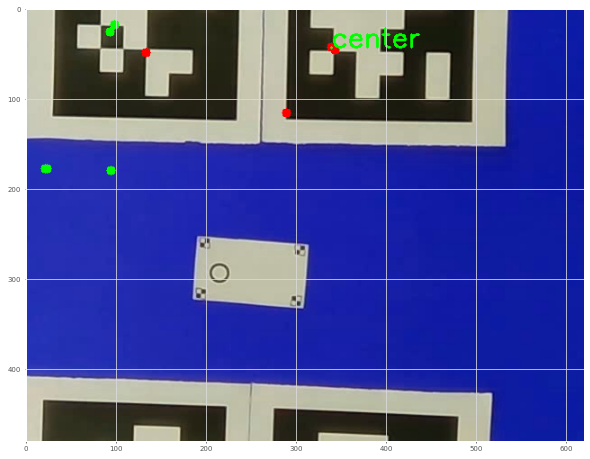

In [1316]:
# image_path = "250330.png"
# image_path = "webcam_franka_2025-03-29-161236.jpg"
image_path = "20250330_193106_rec_vids/20250330_193106_rec_vids_0012.jpg"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


frame_center_crop = img[300:780, 700:1320]
frame_grey_center_crop = gray[300:780, 700:1320]
# frame_center_crop = img[400:600, 250:750]
# frame_grey_center_crop = gray[400:500, 250:750]

hg_mat, corners, mask, src_pts, dest_pts =  match_fiducial_orb(
    frame_grey_center_crop, template_chip_blur, min_match_count=1, good_match_ratio=0.65)

fig, ax = plt.subplots(figsize=(10, 10))
frame = frame_center_crop.copy()

for i in range(len(mask)):
    if mask[i] == 1:
        cv2.circle(frame, tuple(src_pts[i,0].astype(int)), 5, (0,255,0), -1)
        cv2.circle(frame, tuple(dest_pts[i,0].astype(int)), 5, (255,0,0), -1)

cv2.polylines(frame, [corners.astype(int)], True, (0,255,0), 2)
cv2.putText(frame, f"center", np.mean(corners, axis=0).astype(int), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
plt.imshow(frame)

In [169]:
from spatialmath import SE3, SO3
from scipy.spatial.transform import Rotation as R

# Initialize Franka Panda robot
robot = rtb.models.Panda()

# Known camera to end-effector transform (example)
# T_ee_cam = SE3(0.1, 0.0, 0.05) * SE3.Rz(np.pi/2)  # Adjust based on calibration
T_ee_cam =  SE3(
    [[ 0.01212702, -0.9994259,  0.03163564,  0.0537774 ],
    [ 0.99985468,  0.01174098, -0.01236027, -0.03114828],
    [ 0.01198174, 0.03178094,  0.99942304, -0.05437236],
    [ 0.,          0.,          0. ,         1.        ]]
)

def compute_item_pose_base(H, K, T_base_cam):
    # Decompose homography to get rotation and translation
    H_normalized = np.linalg.inv(K) @ H
    H_normalized /= np.linalg.norm(H_normalized[:, 0])
    
    r1, r2, t = H_normalized[:, 0], H_normalized[:, 1], H_normalized[:, 2]
    r3 = np.cross(r1, r2)
    R_cam_to_item = np.column_stack((r1, r2, r3))
    
    # Ensure orthogonal rotation matrix
    U, _, Vt = np.linalg.svd(R_cam_to_item)
    R_cam_to_item = U @ Vt
    
    # Item's rotation in camera frame (yaw)
    yaw_cam = np.arctan2(R_cam_to_item[1,0], R_cam_to_item[0,0])
    
    # Item's position in camera frame (origin of item's plane)
    item_pos_cam = -R_cam_to_item.T @ t  # Homography translation adjustment
    
    # Transform item pose to base frame
    item_pos_base = T_base_cam * item_pos_cam
    item_rot_base = T_base_cam.R @ R_cam_to_item.T
    
    # Extract yaw in base frame
    yaw_base = np.arctan2(item_rot_base[1,0], item_rot_base[0,0])
    return item_pos_base, yaw_base

# Example homography matrix (replace with actual)
H = homography
width, height = 1920, 1080
ppx = 951.094909667969
ppy = 529.039794921875
fx = 1366.31372070312
fy = 1363.66088861788
fov_deg = (70.18, 43.2)
distortion = "inverse brown conrady"

K = np.array([
    [fx, 0, ppx],
    [0, fy, ppy],
    [0, 0, 1]
])

# Current joint angles (get from robot)
# q_current = robot.q
q_current = device_view_conf_ref
robot.q = q_current

# Current end-effector and camera poses
T_base_ee = robot.fkine(q_current)
# T_base_ee = robot.fkine(robot.qr)
T_base_cam = T_base_ee * T_ee_cam

# Compute item's base pose
item_pos_base, item_yaw_base = compute_item_pose_base(H, K, T_base_cam)

# Desired gripper pose (orthogonal orientation)
desired_yaw = item_yaw_base # 90° offset
desired_yaw = item_yaw_base + np.pi
desired_pos = np.append(item_pos_base[:2], T_base_ee.t[2])  # Keep current height
desired_pose_T = SE3(desired_pos) * SE3.Rz(desired_yaw) * SE3.Rx(-np.pi)
desired_pose = desired_pose_T.copy()  # avoid modifying original
desired_pose.t[2] = T_base_ee.t[2]


# item_position_base = T_base_item.t  # From previous computation
# original_z_height = item_pos_base[2]  # Retain original z-coordinate

# # Construct desired pose: same x/y as item, original z, orthogonal orientation
# desired_position = np.array([
#     item_pos_base[0], 
#     item_pos_base[1], 
#     original_z_height  # Keep original z-height
# ])

# desired_yaw = item_yaw_base + np.pi/2  # Orthogonal rotation
# desired_pose = SE3(desired_position) * SE3.Rz(desired_yaw) * SE3.Rx(-np.pi)



# Solve inverse kinematics
sol = robot.ikine_LM(desired_pose, q0=q_current, tol=1e-6,)

if sol.success:
    
    robot.q = sol.q
    print("Gripper moved to orthogonal pose")
else:
    print("IK failed to converge")
print(sol.q)

Gripper moved to orthogonal pose
[ 0.12488126  0.21897983  0.52659863 -2.27558229 -0.17379266  2.45823754
  1.48661277]


In [167]:
desired_pose, T_base_cam

(   0.9995    0.03218   0         0.4278    
   0.03218  -0.9995    0         0.002698  
   0         0        -1         0.4126    
   0         0         0         1         
,
    0.01326  -0.9913    0.1313    0.5321    
  -0.9999   -0.01174   0.01236   0.03115   
  -0.01071  -0.1314   -0.9913    0.4721    
   0         0         0         1         
)

In [170]:
import swift

env = swift.Swift()
env.launch()


panda1 = rtb.models.Panda()

start_pose = SE3(0.5, 0, 0.5)*SE3.RPY(-3.13, 0.097, 0.035) #transition pose:

start_pose_conf = panda1.ikine_LM(start_pose, q0=panda1.qr, tol=1e-6,).q

# Device View pose: 
# initial Joint pos [ 0.13221747  0.27428757  0.48116831 -2.17921678 -0.23556797  2.35521001
#   1.5223894 ]
device_view_conf_ref = np.array(
    [0.13221747,  0.27428757,  0.48116831,
        -2.17921678, -0.23556797,  2.35521001, 1.5223894])

#  Right Above Device (xy match):
# initial Joint pos [ 0.0973128   0.43224232  0.48596056 -1.92389406 -0.24285749  2.23150608
#   1.47799659]
right_above_device_conf_ref = np.array(
    [0.0973128,  0.43224232,  0.48596056,
        -1.92389406, -0.24285749,  2.23150608, 1.47799659])

# Pickup Device 1:
# initial Joint pos [ 0.17615997  0.78776473  0.34810074 -1.88649316 -0.38730545  2.50600192
#   1.55563209]
pickup_device_conf_ref = np.array(
    [0.17615997,  0.78776473,  0.34810074,
        -1.88649316, -0.38730545,  2.50600192, 1.55563209])


# Placement of Device:
# initial Joint pos [-0.37410682  0.66102567  0.4040733  -2.17860319 -0.58851263  2.65233596
#   1.26067877]
placement_device_conf_ref = np.array(
    [-0.37410682,  0.66102567,  0.4040733,
        -2.17860319, -0.58851263,  2.65233596, 1.26067877])

# Slightly Above Pipette:
# initial Joint pos [ 0.08392724  0.65863559  0.88282196 -1.44607387 -0.51607189  1.79360181
#   1.7871763 ]
slightly_above_pipet_conf_ref = np.array(
    [0.08392724,  0.65863559,  0.88282196,
        -1.44607387, -0.51607189,  1.79360181, 1.7871763 ])

# Pickup Pipette:
# initial Joint pos [ 0.10665186  0.78125132  0.79928242 -1.56403597 -0.60438197  1.99854486
#   1.83208292]
pickup_pipet_conf_ref = np.array(
    [0.10665186,  0.78125132,  0.79928242, 
        -1.56403597, -0.60438197,  1.99854486, 1.83208292])


#     Pipette over inlet (slightly above and viewing device):
# initial Joint pos [-0.37043424 -0.08761348  0.47809342 -2.3003573   0.02309141  2.14407715
#   0.86385094]
pipette_over_inlet_conf_ref = np.array(
    [-0.37043424, -0.08761348,  0.47809342,
        -2.3003573,   0.02309141,  2.14407715, 0.86385094])

#     Pipette at inlet (dispensing):
# initial Joint pos [-0.3653601   0.3733722   0.45411027 -2.20815074 -0.27371639  2.45975217
#   1.07001568]
pipette_at_inlet_conf_ref = np.array(
    [-0.3653601,   0.3733722,   0.45411027,
        -2.20815074, -0.27371639,  2.45975217, 1.07001568])


list_confs = [
    # start_pose_conf,
    device_view_conf_ref, 
    sol.q,
    right_above_device_conf_ref, 
    # pickup_device_conf_ref, 
    # placement_device_conf_ref, 
    # slightly_above_pipet_conf_ref, 
    # pickup_pipet_conf_ref, 
    # pipette_over_inlet_conf_ref, 
    # pipette_at_inlet_conf_ref
    ]


for conf in list_confs:
    panda1.q = conf
    env.add(panda1,)
    # env.step(0.1)

In [118]:
robot.plot(sol.q)

Swift backend, t = 0.05, scene:
  panda

In [95]:
T_base_ee

   0.9947    0.03387  -0.09718   0.5       
   0.03483  -0.9994    0.008195 -1.165e-07  
  -0.09684  -0.01154  -0.9952    0.5       
   0         0         0         1         


In [94]:
item_pos_base, item_yaw_base

(array([[ 4.88663916e-01],
        [-3.44801977e-04],
        [ 7.30438488e-01]]),
 -3.0765791675331036)

In [88]:
robot.plot(q_current)

Swift backend, t = 0.05, scene:
  panda

In [89]:
robot.plot(sol.q)

Swift backend, t = 0.05, scene:
  panda

In [62]:
from spatialmath import SE3, SO3

In [1080]:
T_goal

  -0.7775    0.6289    0         1.009     
  -0.6289   -0.7775    0        -0.5136    
   0         0         1         0.1       
   0         0         0         1         


In [1035]:
import swift

# Make the environment
env = swift.Swift()

# Launch the simulator, will open a browser tab
env.launch(realtime=True)

# You can also visulize the simulator in this notebook with the following if you uncomment it
# env.launch(realtime=True, browser="notebook")

# Add the Panda to the Swift environment
env.add(panda)


0

In [1079]:
panda.plot(sol.q)

Swift backend, t = 0.05, scene:
  panda

In [ ]:
for _, row in df.iterrows():
    jointpos = json.loads(row['Event'])
    panda.plot(jointpos)
    # panda.q = jointpos


In [1024]:
df = pd.read_csv("joints.csv")

In [1070]:
tuple(dest_pts[i])

(array([378., 374.], dtype=float32),)

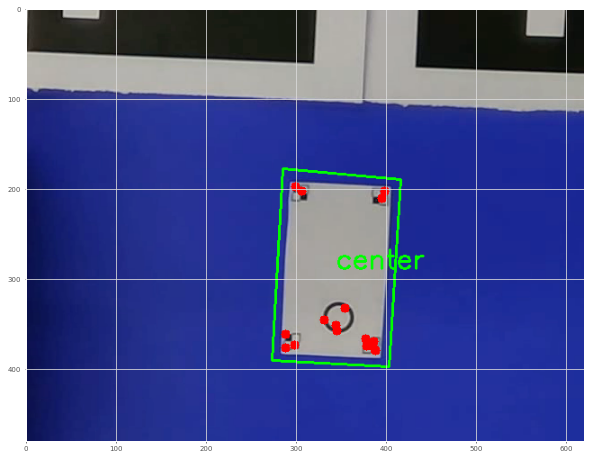

In [1072]:
fig, ax = plt.subplots(figsize=(10, 10))

# filter by matches_mask
# for i in range(len(mask)):
#     if mask[i] == 1:
#         plt.plot(src_pts[i,0,0], src_pts[i,0,1], 'bo')
#         plt.plot(dest_pts[i,0,0], dest_pts[i,0,1], 'ro')

# plt.plot(corners[:,0], corners[:,1], 'co')


frame = frame_center_crop.copy()
# for i in range(4):
#     start_pt = tuple(corners[i].astype(int))
#     end_pt = tuple(corners[(i+1)%4].astype(int))
#     cv2.line(frame, start_pt, end_pt, (0,255,0),2)

for i in range(len(mask)):
    if mask[i] == 1:
        # plt.plot(src_pts[i,0,0], src_pts[i,0,1], 'bo')
        # plt.plot(dest_pts[i,0,0], dest_pts[i,0,1], 'ro')
        cv2.circle(frame, tuple(dest_pts[i,0].astype(int)), 5, (255,0,0), -1)

# plt.plot(corners[:,0], corners[:,1], 'co')
cv2.polylines(frame, [corners.astype(int)], True, (0,255,0), 2)

# find corner center
corner_center = np.mean(corners, axis=0).astype(int)

cv2.putText(frame, f"center", corner_center, cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
plt.imshow(frame)

In [983]:
orb = cv2.ORB_create(
    nfeatures = 100,                    # The maximum number of features to retain.
    scaleFactor = 1.2,                  # Pyramid decimation ratio, greater than 1
    nlevels = 4,                        # The number of pyramid levels.
    edgeThreshold = 11,                  # This is size of the border where the features are not detected. It should roughly match the patchSize parameter
    firstLevel = 0,                     # It should be 0 in the current implementation.
    WTA_K = 2,                          # The number of points that produce each element of the oriented BRIEF descriptor.
    # scoreType = cv2.ORB_HARRIS_SCORE,   # The default HARRIS_SCORE means that Harris algorithm is used to rank features (the score is written to KeyPoint::score and is 
                                        # used to retain best nfeatures features); 
    scoreType = cv2.ORB_FAST_SCORE,     # FAST_SCORE is alternative value of the parameter that produces slightly less stable 
                                        # keypoints, but it is a little faster to compute.
    patchSize = 7                      
)

# 3. Detect keypoints and compute descriptors
kp_template, desc_template = orb.detectAndCompute(preprocess_image(template_chip_blur), None)
kp_source, desc_source = orb.detectAndCompute(preprocess_image(frame_grey_center_crop), None)

# good_matches = []
# for m in matches_rd:
#     if len(m) == 1:
#         good_matches.append(m[0])

# Create a Brute-Force matcher with Hamming distance (suitable for ORB)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
raw_matches = bf.match(desc_template, desc_source)

# Sort matches by distance (lower distance is better)
raw_matches = sorted(raw_matches, key=lambda x: x.distance)

# Optionally, keep only a subset of the best matches
num_good_matches = min(50, len(raw_matches))
good_matches = raw_matches[:num_good_matches]


# # 7. Check if enough matches are present
# if len(good_matches) < min_match_count:
#     # Not enough matches to reliably compute homography
#     return None, None, None

# # 8. Extract matched keypoints’ coordinates
src_pts = np.float32([kp_template[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp_source[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# stack a column of ones to the source points
src_pts_3d = np.hstack((src_pts.squeeze(), np.ones((src_pts.squeeze().shape[0], 1), dtype=np.float32)))
dst_pts_3d = np.hstack((dst_pts.squeeze(), np.ones((dst_pts.squeeze().shape[0], 1), dtype=np.float32)))

# # 9. Compute homography with RANSAC
# homography, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
homography, mask = cv2.findHomography(src_pts_3d, dst_pts_3d, 0, 5, maxIters=20)
# homography, mask = cv2.findHomography(src_pts[:,0,:], dst_pts[:,0,:], 0, 5, maxIters=10)


matches_mask = mask.ravel().tolist()


# # 10. Once we have the homography, transform the corners of the template
hT, wT = desc_template.shape[:2]
template_corners = np.float32([[0, 0],
                                [wT, 0],
                                [wT, hT],
                                [0, hT]]).reshape(-1, 1, 2)

corners_in_scene = cv2.perspectiveTransform(template_corners, homography)


# if len(good_matches) >= 4:
#     H, mask = cv2.findHomography(src_pts, dst_pts, 0, 5, maxIters=10)
#     if H is not None:
#         h_temp, w_temp = template_chip_blur.shape[:2]
#         # Define template corners in the template image
#         template_corners = np.float32([[0, 0], [w_temp, 0], [w_temp, h_temp], [0, h_temp]]).reshape(-1, 1, 2)
#         # Transform the template corners to the source image using the computed homography.
#         transformed_corners = cv2.perspectiveTransform(template_corners, H)
#         print(H, transformed_corners, good_matches)

In [981]:
template_corners, corners_in_scene

(array([[[  0.,   0.]],
 
        [[ 32.,   0.]],
 
        [[ 32., 122.]],
 
        [[  0., 122.]]], dtype=float32),
 array([[[ 1.2758476e+06, -1.2870384e+06]],
 
        [[ 3.3432559e+02,  2.8310211e+02]],
 
        [[ 3.3825742e+02,  2.8042856e+02]],
 
        [[ 3.4002859e+02,  2.7788913e+02]]], dtype=float32))

In [984]:
homography

array([[-1.94854910e+06,  8.66356944e+05,  1.27584765e+06],
       [-1.57602194e+06,  7.27128277e+05, -1.28703844e+06],
       [-5.70907328e+03,  2.57864165e+03,  1.00000000e+00]])

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

for i in range(src_pts.shape[0]):
    # plt.plot(good_matches_src[i,0], good_matches_src[i,1], 'yo')
    # plt.plot(good_matches_dst[i,0], good_matches_dst[i,1], 'go')
    # plt.plot(src_pts[i,0,0], src_pts[i,0,1], 'yo')
    # plt.plot(dst_pts[i,0,0], dst_pts[i,0,1], 'ro')

    if mask[i] == 1:
        plt.plot(src_pts[i,0,0], src_pts[i,0,1], 'yo')
        plt.plot(dst_pts[i,0,0], dst_pts[i,0,1], 'ro')

ax.imshow(frame_center_crop)
ax.plot(corners_in_scene[:,0,0], corners_in_scene[:,0,1], 'co')

In [912]:
def match_markers(source, template_to_match):
    matches = []

    top_k = 4
    scales = [0.25, 0.35, 0.5, 0.7]  # Define scales to resize the template
    # angles = [0, 11.25, 22.5, 33.75, 45, 56.25, 67.5, 78.75, 90]  # Define angles to rotate the template
    angles = [0, 22.5, 45, 67.5,]  # Define angles to rotate the template

    for angle in angles:
        # Rotate the template
        center = (template_to_match.shape[1] // 2, template_to_match.shape[0] // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated_template = cv2.warpAffine(template_to_match, rotation_matrix, (template_to_match.shape[1], template_to_match.shape[0]))

        for scale in scales:
            # Resize the rotated template
            # resized_template = cv2.resize(rotated_template, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
            
            h_rot, w_rot = rotated_template.shape[:2]
            scaled_h, scaled_w = int(h_rot * scale), int(w_rot * scale)

            interpolation = cv2.INTER_AREA if scale < 1.0 else cv2.INTER_CUBIC
            resized_template = cv2.resize(rotated_template, (scaled_w, scaled_h), interpolation=interpolation)

            result = cv2.matchTemplate(source, resized_template, cv2.TM_CCOEFF_NORMED)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

            # Store the match details
            matches.append((max_val, max_loc, resized_template.shape[::-1]))

    # Remove duplicate matches based on location
    # unique_matches = []
    # seen_locations = set()

    # for match in matches:
    #     _, location, _ = match
    #     if location not in seen_locations:
    #         unique_matches.append(match)
    #         seen_locations.add(location)

    # remove matches that are too close to each other
    unique_matches = []
    seen_locations = set()
    for match in matches:
        _, location, _ = match
        if all(abs(location[0] - loc[0]) > 10 or abs(location[1] - loc[1]) > 10 for loc in seen_locations):
            unique_matches.append(match)
            seen_locations.add(location)


    matches = unique_matches

    # Sort matches by their score in descending order and keep the top-k
    matches = sorted(matches, key=lambda x: x[0], reverse=True)[:top_k]

    return matches

In [898]:
match_ri

[(0.6590341329574585, (382, 198), (23, 23)),
 (0.5733720660209656, (385, 201), (16, 16)),
 (0.5266430974006653, (119, 187), (16, 16)),
 (0.48492667078971863, (210, 185), (23, 23))]

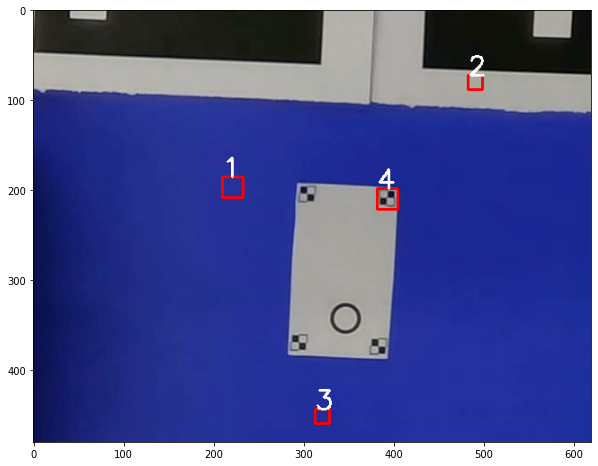

In [913]:
match_ri = match_markers(frame_grey_center_crop, template_a_blur)

# Draw the matched templates using cv2
matched_num = 0
frame = frame_center_crop.copy()
for _, top_left, (h,w) in match_ri:
    top_left = (top_left[0] , top_left[1] )
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(frame, top_left, bottom_right, 255, 2)
    cv2.putText(frame, f"{len(match_ri)-matched_num}",
                    top_left, cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    matched_num +=1

# for match in match_ri:
#     _, location, (w, h) = match
#     # cv2.rectangle(frame_center_crop, location, (location[0] + w, location[1] + h), (0, 255, 0), 2)
#     plt.plot(location[0], location[1], 'ro')

fig, ax = plt.subplots(figsize=(10, 10))

# Draw the centroids on the source image
ax.imshow(frame)

# plt.imshow(frame)

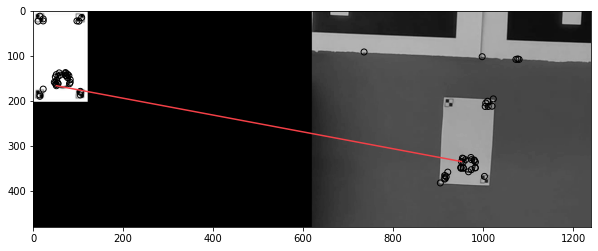

In [927]:
import skimage as ski
from sklearn.cluster import KMeans
from scipy.spatial import distance

src_pts_yx = src_pts.squeeze()[:, [1, 0]]
dst_pts_yx = dst_pts.squeeze()[:, [1, 0]]

# Perform KMeans clustering on src_pts and dst_pts
kmeans_src = KMeans(n_clusters=5, random_state=0).fit(src_pts_yx)
kmeans_dst = KMeans(n_clusters=5, random_state=0).fit(dst_pts_yx)

# Get the centroids of the clusters
centroids_src = kmeans_src.cluster_centers_
centroids_dst = kmeans_dst.cluster_centers_

# Match the centroids using nearest neighbor
# centroid_matches = []
# for src_centroid in centroids_src:
#     distances = distance.cdist([src_centroid], centroids_dst, metric='euclidean')
#     closest_dst_idx = distances.argmin()
#     centroid_matches.append((src_centroid, centroids_dst[closest_dst_idx]))

matches = ski.feature.match_descriptors(centroids_src, centroids_dst, cross_check=True)
# src_pts[matches[:, 0], 0, :], dst_pts[matches[:, 1], 0, :]
fig, ax = plt.subplots(figsize=(10, 10))
ski.feature.plot_matches(ax, template_chip_blur, frame_grey_center_crop, src_pts_yx, dst_pts_yx, matches, )

In [849]:
centroids_dst, centroids_src

(array([[ 54.     , 317.25   ],
        [362.29688, 370.25   ],
        [207.65277, 343.06946],
        [ 27.     , 558.     ],
        [374.45   , 292.05   ]], dtype=float32),
 array([[180.125   ,  17.125   ],
        [ 17.85714 , 103.07143 ],
        [180.3     , 102.5     ],
        [ 17.199997,  17.599998],
        [159.375   ,  57.      ]], dtype=float32))

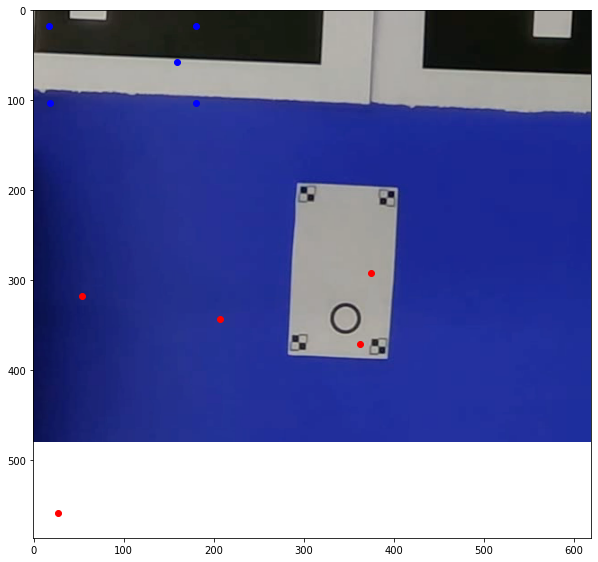

In [850]:
fig, ax = plt.subplots(figsize=(10, 10))

# Draw the centroids on the source image
ax.imshow(frame_center_crop)
ax.plot(centroids_dst[:, 0], centroids_dst[:, 1], 'ro')
ax.plot(centroids_src[:, 0], centroids_src[:, 1], 'bo')

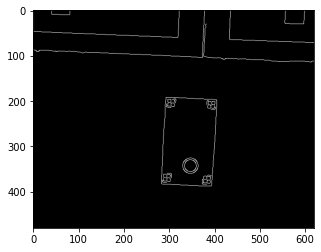

In [916]:
plt.imshow(preprocess_image(frame_center_crop), cmap='gray')

In [806]:
def preprocess_image(image):
    """Applies Gaussian blur and Canny edge detection to enhance features."""
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(image, (3, 3), 0)
    edges = cv2.Canny(blurred, 50, 150)
    return edges

def rotate_image(image, angle):
    """Rotates the image without cropping, preserving the entire content."""
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    cos, sin = np.abs(M[0, 0]), np.abs(M[0, 1])
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    rotated = cv2.warpAffine(image, M, (nW, nH), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_CONSTANT, borderValue=0)
    return rotated

def non_max_suppression(matches, threshold=20):
    """Filters overlapping matches, keeping the highest-scoring ones."""
    sorted_matches = sorted(matches, key=lambda x: x[0], reverse=True)
    suppressed = []
    for current in sorted_matches:
        curr_x, curr_y = current[1]
        add = True
        for kept in suppressed:
            kept_x, kept_y = kept[1]
            distance = np.sqrt((curr_x - kept_x)**2 + (curr_y - kept_y)**2)
            if distance < threshold:
                add = False
                break
        if add:
            suppressed.append(current)
    return suppressed

def match_markers(source, template_to_match, top_k=1):
    """Performs robust scale and rotation-invariant template matching."""
    source_processed = preprocess_image(source)
    template_processed = preprocess_image(template_to_match)
    
    h_src, w_src = source_processed.shape[:2]
    h_tmpl, w_tmpl = template_processed.shape[:2]
    
    # Dynamic scale calculation
    max_scale_w = (w_src / w_tmpl) * 0.9
    max_scale_h = (h_src / h_tmpl) * 0.9
    max_scale = min(2.0, max_scale_w, max_scale_h)
    min_scale = max(0.1, 10 / min(w_tmpl, h_tmpl))  # Ensure template is at least 10px
    scales = np.geomspace(min_scale, max_scale, num=10)
    
    # Coarse-to-fine angle search (coarse first pass)
    angles = np.arange(0, 360, 15)
    
    matches = []
    for angle in angles:
        rotated_template = rotate_image(template_processed, angle)
        for scale in scales:
            # Check if scaled template exceeds source dimensions
            h_rot, w_rot = rotated_template.shape[:2]
            scaled_h, scaled_w = int(h_rot * scale), int(w_rot * scale)
            if scaled_h > h_src or scaled_w > w_src:
                continue
            
            # Optimized resizing
            interpolation = cv2.INTER_AREA if scale < 1.0 else cv2.INTER_CUBIC
            resized_template = cv2.resize(rotated_template, (scaled_w, scaled_h), interpolation=interpolation)
            
            # Template matching
            result = cv2.matchTemplate(source_processed, resized_template, cv2.TM_CCOEFF_NORMED)
            _, max_val, _, max_loc = cv2.minMaxLoc(result)
            
            matches.append((max_val, max_loc, (scaled_w, scaled_h), angle))
    
    # Apply non-maximum suppression
    matches = non_max_suppression(matches, threshold=max(h_tmpl, w_tmpl)//4)
    
    # Refine around best angles (fine second pass)
    if matches:
        refined_matches = []
        best_angles = {match[3] for match in matches[:3]}  # Top 3 angles from first pass
        for base_angle in best_angles:
            for fine_angle in np.arange(base_angle-7, base_angle+8, 5):
                angle = fine_angle % 360
                rotated_template = rotate_image(template_processed, angle)
                for scale in scales:
                    h_rot, w_rot = rotated_template.shape[:2]
                    scaled_h, scaled_w = int(h_rot * scale), int(w_rot * scale)
                    if scaled_h > h_src or scaled_w > w_src:
                        continue
                    interpolation = cv2.INTER_AREA if scale < 1.0 else cv2.INTER_CUBIC
                    resized_template = cv2.resize(rotated_template, (scaled_w, scaled_h), interpolation=interpolation)
                    result = cv2.matchTemplate(source_processed, resized_template, cv2.TM_CCOEFF_NORMED)
                    _, max_val, _, max_loc = cv2.minMaxLoc(result)
                    refined_matches.append((max_val, max_loc, (scaled_w, scaled_h), angle))
        matches += refined_matches
        matches = non_max_suppression(matches, threshold=max(h_tmpl, w_tmpl)//4)
    
    # Return top-k matches
    matches = sorted(matches, key=lambda x: x[0], reverse=True)[:top_k]
    return [(val, loc, size) for val, loc, size, _ in matches]

In [823]:
ret = match_markers(frame_center_crop, template_a, top_k=4)
val, loc, size = ret[0]
ret[0]

(0.5752332210540771, (396, 196), (11, 11))

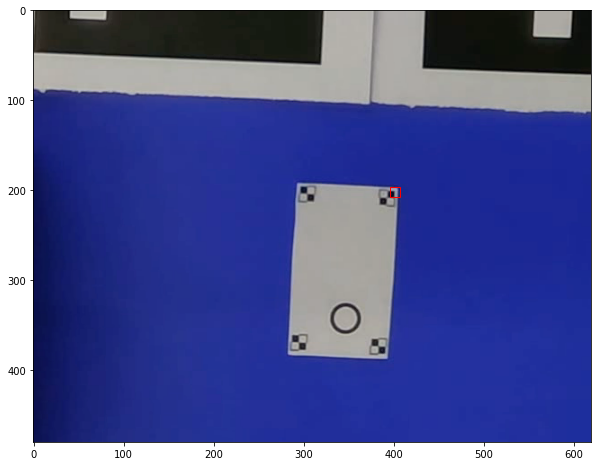

In [825]:
val, loc, size = ret[0]
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(frame_center_crop, cmap='gray')
rect = plt.Rectangle(loc, size[0], size[1], edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

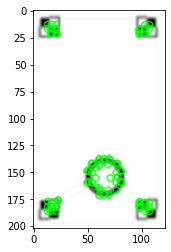

In [818]:
plt.imshow(cv2.drawKeypoints(template_chip_blur, kp_template, None, color=(0, 255, 0), flags=0))

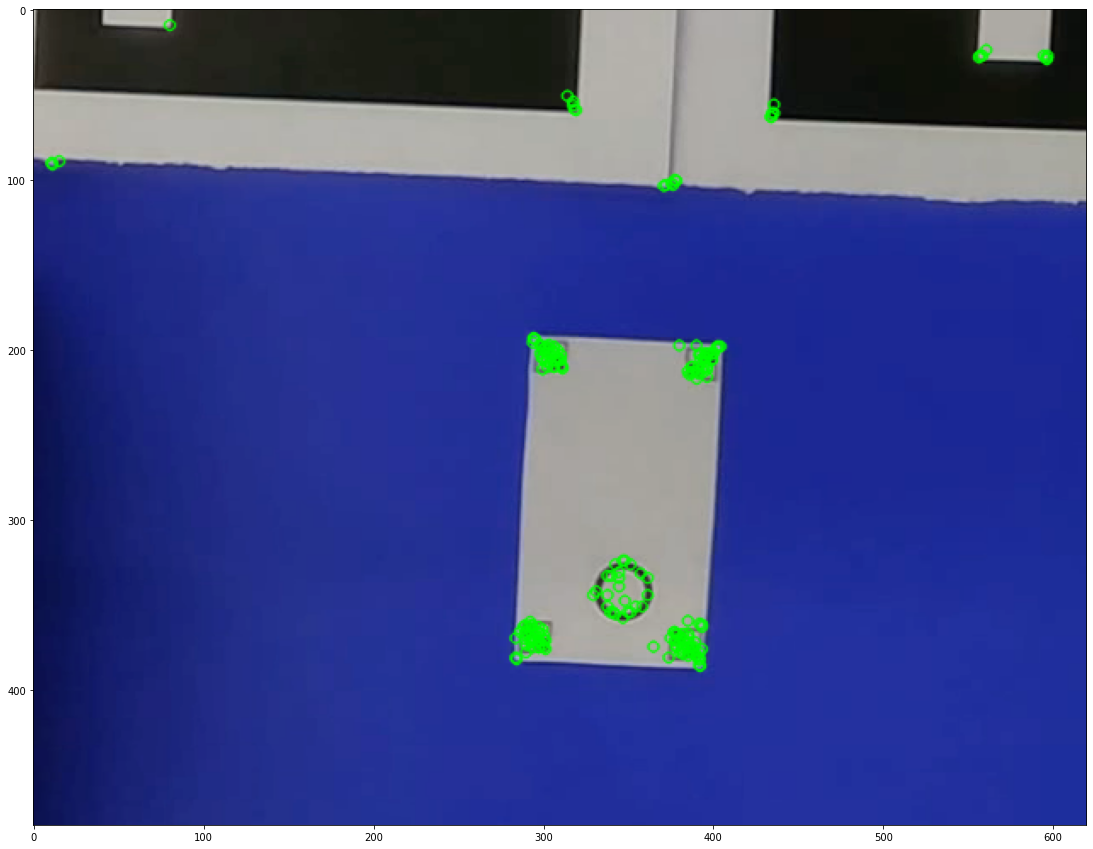

In [515]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))Z
ax.imshow(cv2.drawKeypoints(frame_center_crop, kp_source, None, color=(0, 255, 0), flags=0))

In [472]:
# Draw the matches
draw_params = dict(matchColor=(0, 255, 0), # draw matches in green color
                   singlePointColor=None,
                   matchesMask=mask, # draw only inliers
                   flags=2)


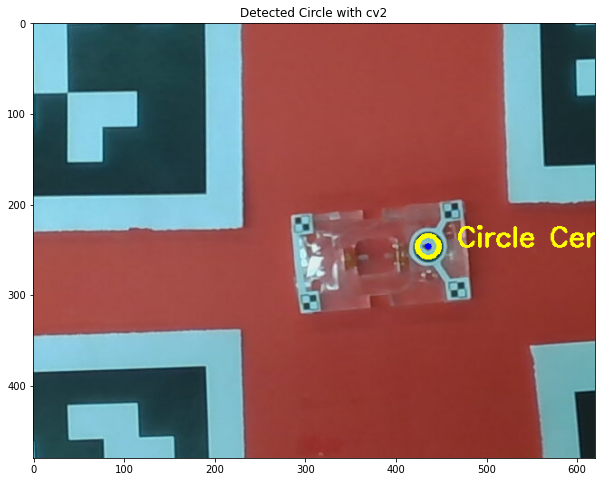

In [71]:
# Draw the detected circle using cv2
center = (int(circles[0][0][0]), int(circles[0][0][1]))  # Circle center
radius = int(circles[0][0][2])  # Circle radius
cv2.circle(frame_center_crop, center, radius, (0, 255, 255), 3)  # Draw the circle's perimeter
cv2.circle(frame_center_crop, center, 3, (255, 0, 0), -1)  # Draw the circle's center
cv2.putText(frame_center_crop, f"  Circle Center: {center}", center, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

# Display the result
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.imshow(cv2.cvtColor(frame_center_crop, cv2.COLOR_BGR2RGB))
ax.set_title("Detected Circle with cv2")
plt.show()

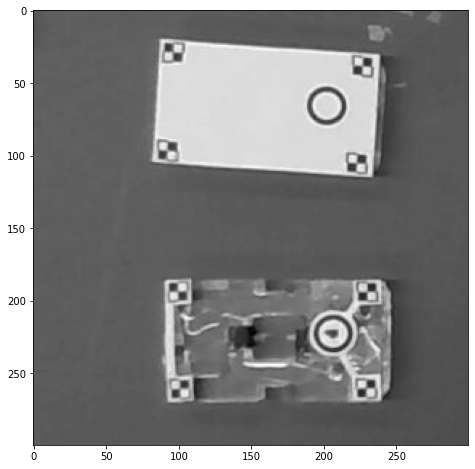

In [87]:
fig, ax = plt.subplots(1,1, figsize=(12, 8))
ax.imshow(gray[400:700,350:650,], cmap='gray')

In [83]:
template_a = cv2.imread("fiducial_template_a.png", cv2.IMREAD_GRAYSCALE)
template_b = cv2.imread("fiducial_template_b.png", cv2.IMREAD_GRAYSCALE)
# resize templates to 40 pixels
# template_a = cv2.resize(template_a, (30, 30))
# template_b = cv2.resize(template_b, (30, 30))

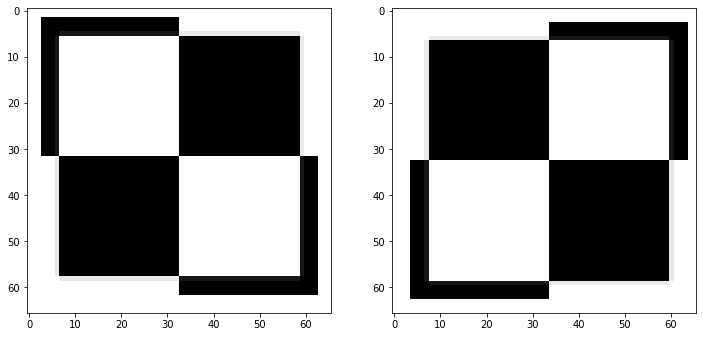

In [84]:
fig, ax = plt.subplots(1,2, figsize=(12, 8))
ax[0].imshow(template_a, cmap='gray')
ax[1].imshow(template_b, cmap='gray')

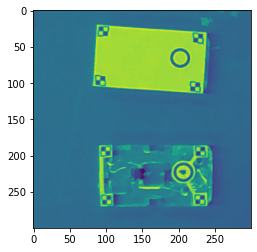

In [92]:
plt.imshow(gray_crop_to_chip)

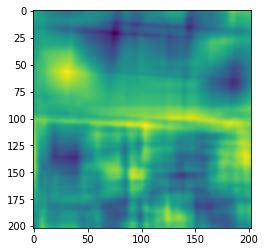

In [118]:
plt.imshow(result)

In [ ]:
# Initialize ORB detector
orb = cv2.ORB_create()

# Detect and compute keypoints and descriptors for the cropped chip and template
keypoints1, descriptors1 = orb.detectAndCompute(gray_crop_to_chip, None)
keypoints2, descriptors2 = orb.detectAndCompute(template_b, None)

# Initialize the BFMatcher with Hamming distance and cross-check
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance (lower distance is better)
matches = sorted(matches, key=lambda x: x.distance)

# Draw the top 20 matches
matched_img = cv2.drawMatches(
    gray_crop_to_chip, keypoints1, template_b, keypoints2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Display the matched image
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.imshow(matched_img, cmap='gray')
ax.set_title("ORB Feature Matching")

In [162]:
# Perform scale-invariant template matching
best_match = None
best_val = -np.inf
# Store the top-k matches
top_k = 3
scales = [0.5, 0.75, 1.0, 1.25, 1.5]  # Define scales to resize the template
# angles = [0, 11.25, 22.5, 33.75, 45, 56.25, 67.5, 78.75, 90]  # Define angles to rotate the template
angles = [0, 22.5, 45, 67.5, 90]  # Define angles to rotate the template

template_to_match = template_a

for angle in angles:
    # Rotate the template
    center = (template_to_match.shape[1] // 2, template_to_match.shape[0] // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_template = cv2.warpAffine(template_to_match, rotation_matrix, (template_to_match.shape[1], template_to_match.shape[0]))

    for scale in scales:
        # Resize the rotated template
        resized_template = cv2.resize(rotated_template, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
        result = cv2.matchTemplate(gray_crop_to_chip, resized_template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        # Store the match details
        matches.append((max_val, max_loc, resized_template.shape[::-1]))

# Remove duplicate matches based on location
unique_matches = []
seen_locations = set()

for match in matches:
    _, location, _ = match
    if location not in seen_locations:
        unique_matches.append(match)
        seen_locations.add(location)

matches = unique_matches

# Sort matches by their score in descending order and keep the top-k
matches = sorted(matches, key=lambda x: x[0], reverse=True)[:top_k]

# Plot the top-k matches
matched_img = gray_crop_to_chip.copy()
match_num = 0
for _, top_left, (h, w) in matches:
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(matched_img, top_left, bottom_right, 255, 2)
    cv2.putText(matched_img, f"{len(matches)-match_num}", top_left, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    match_num +=1

# Display the result
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(matched_img, cmap='gray', )
# ax.imshow(result, alpha=.3,)
ax[1].imshow(result, )
ax[0].set_title("Top-8 Template Matching Results")

In [10]:
detector = apriltag.Detector(apriltag.DetectorOptions(families="tag36h11"))
results = detector.detect(gray)

In [11]:
results

[Detection(tag_family=b'tag36h11', tag_id=0, hamming=0, goodness=0.0, decision_margin=69.3499984741211, homography=array([[-7.12410556e-01,  8.54926857e-02, -1.15264426e+00],
        [-8.75317512e-02, -6.86781916e-01, -1.46144150e+00],
        [-7.72979893e-06,  2.61230732e-05, -5.73566520e-03]]), center=array([200.96086824, 254.79895539]), corners=array([[ 91.36618805, 119.41620636],
        [338.07806397, 149.4390564 ],
        [311.26071167, 391.05279541],
        [ 62.21548462, 361.40994263]])),
 Detection(tag_family=b'tag36h11', tag_id=1, hamming=0, goodness=0.0, decision_margin=69.875, homography=array([[ 7.55295571e-01, -1.72359075e-02,  5.16038257e+00],
        [ 5.45608690e-02,  7.10931013e-01,  1.74462730e+00],
        [ 5.73380259e-05,  1.43709945e-05,  5.96835358e-03]]), center=array([864.62413743, 292.31299316]), corners=array([[749.97277832, 166.04959106],
        [986.95684814, 181.03462219],
        [976.55316162, 415.57833862],
        [740.51727295, 405.2052002 ]]))]

In [13]:
results[0][0]

b'tag36h11'

In [19]:
results[0][5]

array([[-7.12410556e-01,  8.54926857e-02, -1.15264426e+00],
       [-8.75317512e-02, -6.86781916e-01, -1.46144150e+00],
       [-7.72979893e-06,  2.61230732e-05, -5.73566520e-03]])

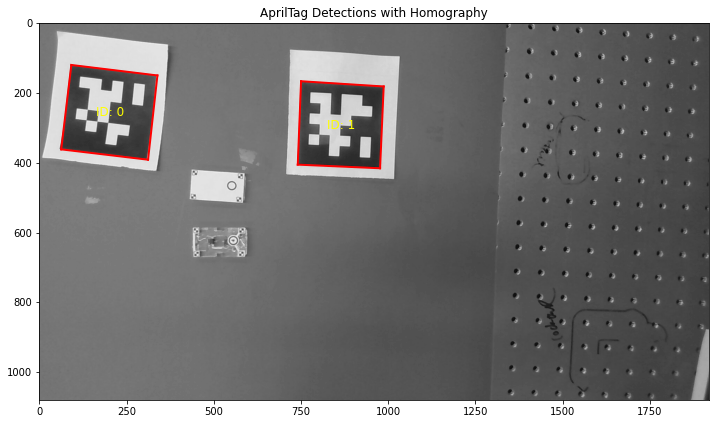

In [20]:
# Plot the detected AprilTags and their homographies
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.imshow(gray, cmap='gray')

for detection in results:
    corners = detection.corners  # Get the corners of the detected tag
    tag_id = detection.tag_id    # Get the tag ID

    # Draw the corners and edges of the tag
    for i in range(4):
        start_point = corners[i]
        end_point = corners[(i + 1) % 4]
        ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 'r-', linewidth=2)
        # Draw the corners and edges of the tag using cv2
        for i in range(4):
            start_point = tuple(corners[i].astype(int))
            end_point = tuple(corners[(i + 1) % 4].astype(int))
            cv2.line(img, start_point, end_point, (0, 0, 255), 2)

        # Annotate the tag ID at the center of the tag using cv2
        center = tuple(detection.center.astype(int))
        cv2.putText(img, f"ID: {tag_id}", center, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)
    
    # Annotate the tag ID at the center of the tag
    center = detection.center
    ax.text(center[0], center[1], f"ID: {tag_id}", color='yellow', fontsize=12, ha='center', va='center')

ax.set_title("AprilTag Detections with Homography")
plt.show()

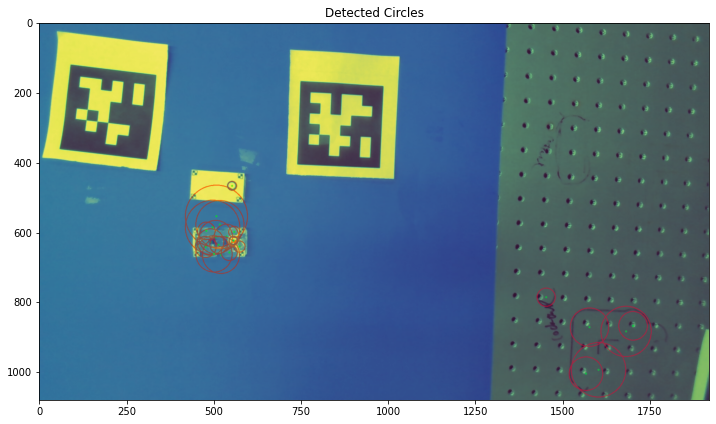

In [35]:
# Convert the image to grayscale if not already done
# gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if len(img.shape) == 3 else img

# Apply GaussianBlur to reduce noise and improve circle detection
blurred_image = cv2.GaussianBlur(gray, (9, 9), 2)

# Use HoughCircles to detect circles
circles = cv2.HoughCircles(
    blurred_image,
    cv2.HOUGH_GRADIENT,
    dp=1.2,  # Inverse ratio of the accumulator resolution to the image resolution
    minDist=300,  # Minimum distance between detected centers
    param1=50,  # Higher threshold for the Canny edge detector
    param2=30,  # Accumulator threshold for circle detection
    minRadius=10,  # Minimum circle radius
    maxRadius=30  # Maximum circle radius
)

# If circles are detected, draw them on the original image
if circles is not None:
    circles = np.uint16(np.around(circles))  # Round circle parameters to integers
    for circle in circles[0, :]:
        center = (circle[0], circle[1])  # Circle center (x, y)
        radius = circle[2]  # Circle radius
        # Draw the circle's center
        cv2.circle(img, center, 3, (0, 255, 0), -1)
        # Draw the circle's perimeter
        cv2.circle(img, center, radius, (255, 0, 0), 2)

# Display the result
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.imshow(blurred_image)
ax.imshow(img, alpha=0.5)
ax.set_title("Detected Circles")
plt.show()

In [11]:
def get_3D_corner_position(tag_id, corner_idx):
    """
    Return the (X, Y, Z) in mm of the given corner_idx of the tag_id.
    This is a placeholder. You need to define how each tag is placed in
    your device coordinate system.
    """
    # Example: each tag is 20mm wide, corners in local tag coords:
    # corner 0: (0, 0, 0)
    # corner 1: (20, 0, 0)
    # corner 2: (20, 20, 0)
    # corner 3: (0, 20, 0)
    # Then offset each tag by (tag_id*40) in X just as a demonstration.
    local_corners = [
        (0,   0, 0),
        (20,  0, 0),
        (20, 20, 0),
        (0,  20, 0)
    ]
    base_x = tag_id * 40
    lx, ly, lz = local_corners[corner_idx]
    return (base_x + lx, ly, lz)


def rotationMatrixToEulerAngles(R):
    """
    Convert a 3x3 rotation matrix to Euler angles (in radians).
    Assuming the order of rotations is Rx, Ry, Rz.
    """
    # From: https://learnopencv.com/rotation-matrix-to-euler-angles/
    sy = np.sqrt(R[0,0]*R[0,0] +  R[1,0]*R[1,0])
    singular = sy < 1e-6

    if not singular:
        x = np.arctan2(R[2,1], R[2,2])
        y = np.arctan2(-R[2,0], sy)
        z = np.arctan2(R[1,0], R[0,0])
    else:
        x = np.arctan2(-R[1,2], R[1,1])
        y = np.arctan2(-R[2,0], sy)
        z = 0

    return np.array([x, y, z])


In [ ]:
# Data structures to store 2D and 3D points for solvePnP
object_points = []  # 3D points in real-world coordinates
image_points  = []  # 2D points in the image

# Suppose you know the real-world 3D corner positions of each AprilTag
# in a coordinate system attached to the device.
# e.g., each tag is a 2x2 cm square, so corners might be:
# top-left = (x0, y0, 0), top-right = (x0+2, y0, 0), etc.
# This is just an example—adjust for your actual geometry.

# Loop over each detected AprilTag
for r in results:
    # 'r' has fields like 'tag_id', 'corners', 'center', etc.
    tag_id = r.tag_id
    corners_2d = r.corners  # shape: (4, 2)

    # corners_2d is in the order:
    #  [top-left, top-right, bottom-right, bottom-left]
    # depending on the apriltag library version.

    # For each corner, store the 2D location
    for corner_idx, (x, y) in enumerate(corners_2d):
        image_points.append([x, y])

        # Append the corresponding 3D coordinate of that corner
        # Example: If each AprilTag is 20 mm wide,
        # define the 3D corner for the current tag and corner index
        # The exact 3D mapping depends on how you place your tags.
        # For example, you might say tag_id=0 is at device corner,
        # tag_id=1 is at another corner, etc.
        # Below is a toy example for demonstration:

        # Let's assume each tag's local coordinate corners (in mm):
        # top-left (0,0,0), top-right (20,0,0), bottom-right (20,20,0), bottom-left (0,20,0)
        # Then you offset them in the global coordinate system based on tag_id or known positions.
        # This part is very application-specific.

        if corner_idx == 0:  # top-left
            X, Y, Z = get_3D_corner_position(tag_id, 0)
        elif corner_idx == 1:  # top-right
            X, Y, Z = get_3D_corner_position(tag_id, 1)
        elif corner_idx == 2:  # bottom-right
            X, Y, Z = get_3D_corner_position(tag_id, 2)
        else:  # bottom-left
            X, Y, Z = get_3D_corner_position(tag_id, 3)

        object_points.append([X, Y, Z])

In [76]:
# If the 4 corners are standard checkerboard patterns:
ret, corners = cv2.findChessboardCorners(gray, (3, 3))
if ret:
    # refine corner positions
    corners_subpix = cv2.cornerSubPix(
        gray, corners, (11,11), (-1,-1),
        criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 0.001)
    )
    # Now corners_subpix holds the 2D locations for the checkerboard corners


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 8))
center_crop_size = 200
ax.imshow(dst[center_crop_size:-center_crop_size, center_crop_size:-center_crop_size])